![title](../reports/figures/Ar_model.jpg)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the U.S. Population dataset
df = pd.read_csv('../data/processed/CO2_Emissions.csv',index_col='year',parse_dates=True)
df.index.freq = 'AS'

In [3]:
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AutoReg,ARResults, AR,AutoRegResults

In [4]:
df2 = df['China']
df2 = df2.to_frame()
df2.head()

,China
year,
1990-01-01,2173.36
1991-01-01,2302.19
1992-01-01,2418.18
1993-01-01,2645.41
1994-01-01,2767.67


<Axes: xlabel='year'>

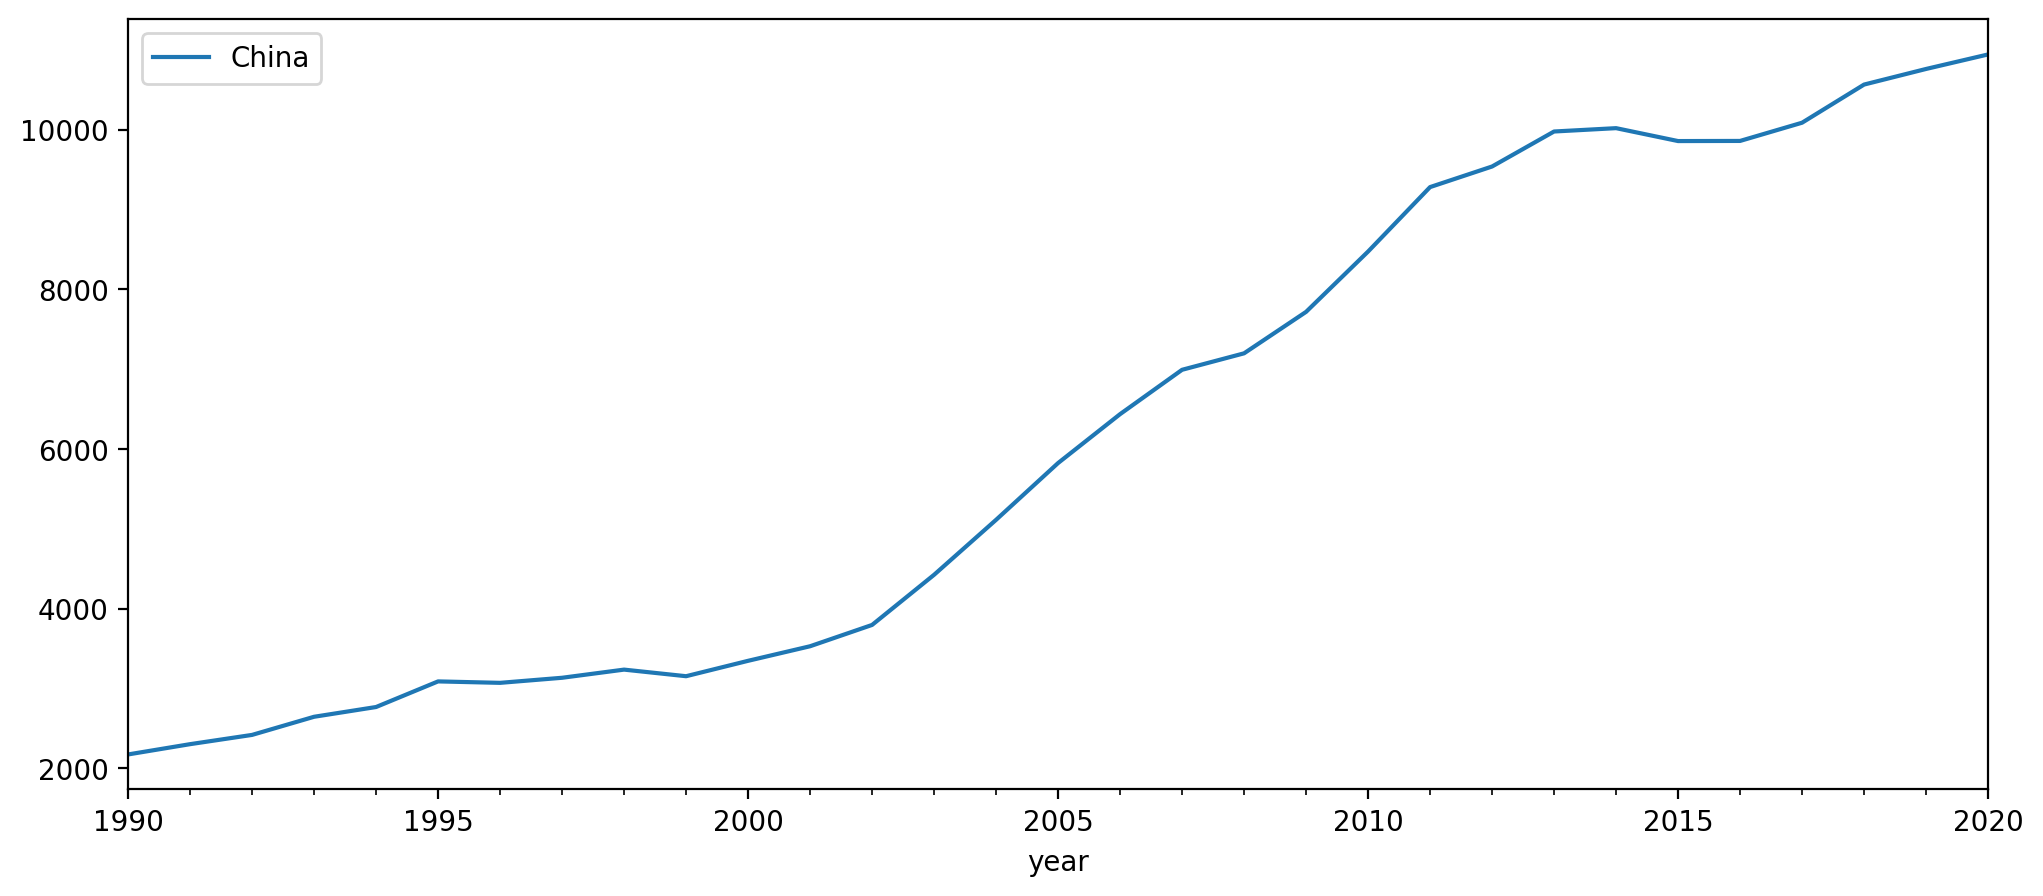

In [5]:
fig = plt.figure(dpi=200)
# df.plot(..., ax = plt.gca())
df2.plot(figsize=(12,5),ax = plt.gca())

## Test and Train Split

- Train Data is Until '2015-01-01'

- Test  Data is After '2015-01-01'


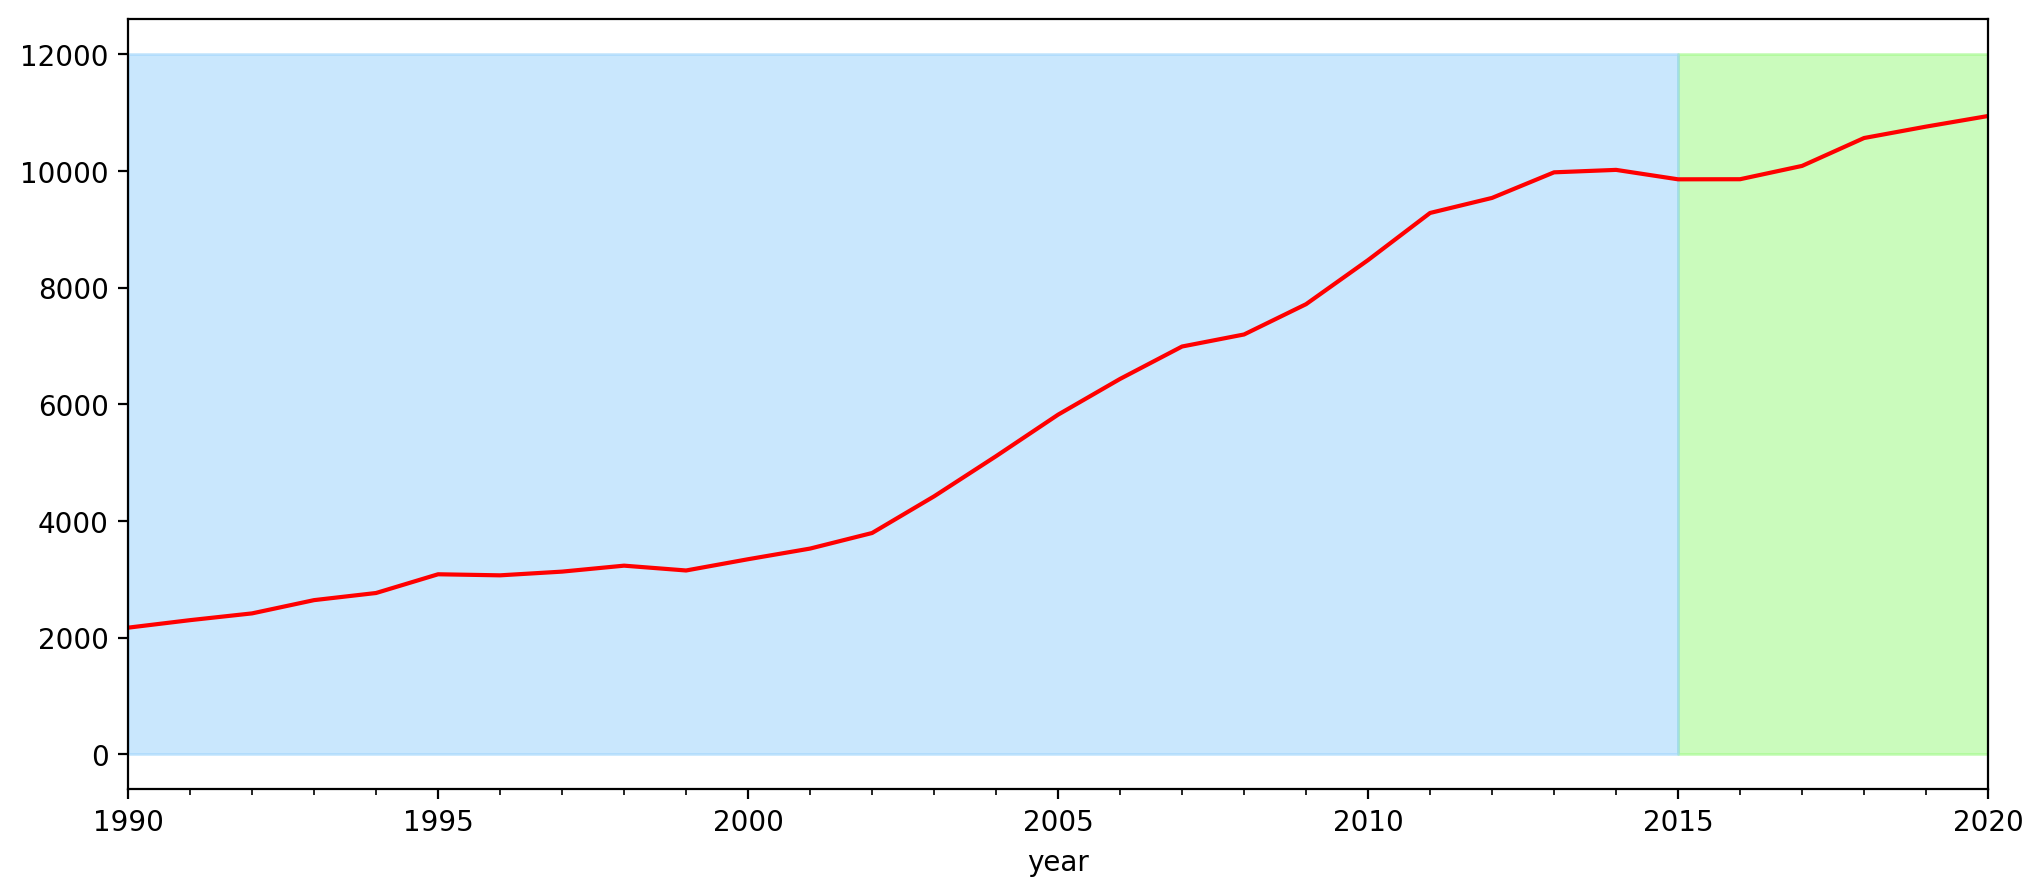

In [6]:
fig = plt.figure(dpi=200)
# df.plot(..., ax = plt.gca())
df2.plot(legend=False,figsize=(12,5),ax = plt.gca(),color='red')

plt.fill_between(df2.index, 0, 12000, where= df.index >= '2015-01-01',
                color='xkcd:light green', alpha=0.5)
plt.fill_between(df2.index, 0, 12000, where= df.index <= '2015-01-01',
                color='xkcd:light blue', alpha=0.5)

In [7]:
# Set one year for testing
train = df2.iloc[:20]
test = df2.iloc[20:]

In [8]:
import warnings
warnings.filterwarnings("ignore")

## Model Fitting and Prediction

In [9]:
start=len(train)
end=start+len(test)-1

In [10]:
AR1fit = AutoReg(train, lags=1,seasonal=False).fit()
predictions1 = AR1fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(1) Predictions')

In [11]:
AR1fit.params

const      -70.705848
China.L1     1.092280
dtype: float64

In [12]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['China'][i]}")

predicted=8360.682524, expected=8474.92
predicted=9061.503267, expected=9282.55
predicted=9826.995984, expected=9540.54
predicted=10663.12863, expected=9979.13
predicted=11576.41987, expected=10021.04
predicted=12573.98993, expected=9859.28
predicted=13663.6161 , expected=9860.91
predicted=14853.79333, expected=10089.27
predicted=16153.80052, expected=10567.26
predicted=17573.77281, expected=10762.82
predicted=19124.78062, expected=10944.69


<Axes: xlabel='year'>

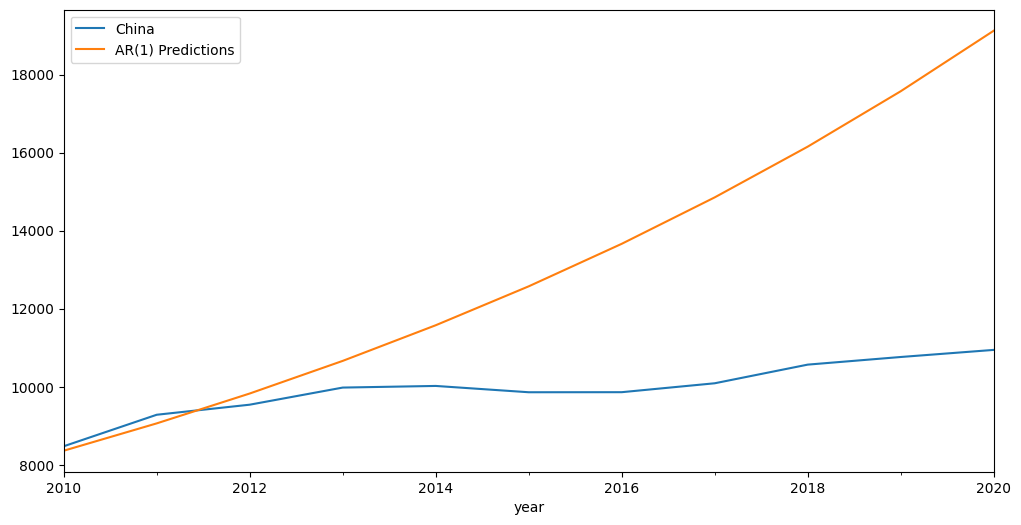

In [13]:
test['China'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))

In [14]:
AR2fit = AutoReg(train, lags=2,seasonal=False).fit()
predictions2 = AR2fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(2) Predictions')

<Axes: xlabel='year'>

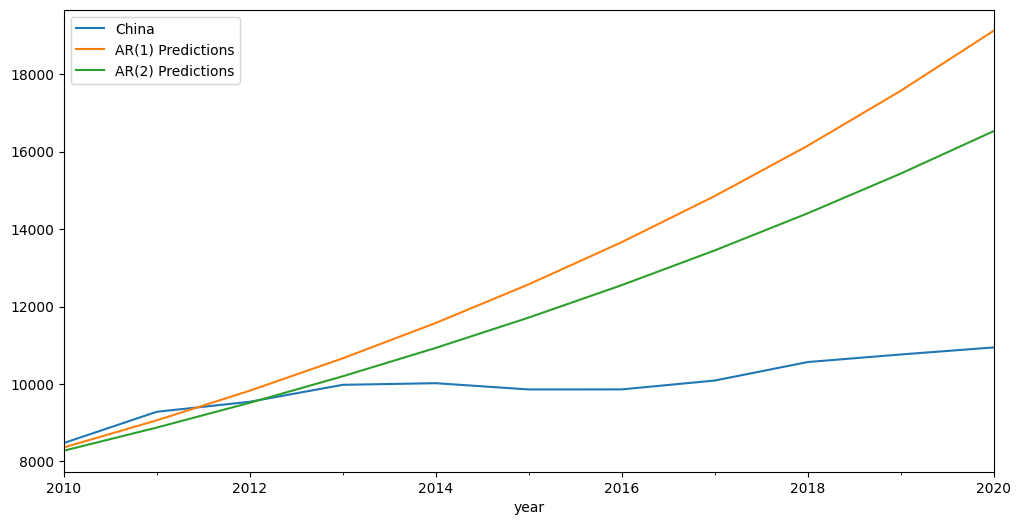

In [15]:
test['China'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))
predictions2.plot(legend=True,figsize=(12,6))

In [16]:
AR3fit = AutoReg(train, lags=3,seasonal=False).fit()
predictions3 = AR3fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(3) Predictions')

<Axes: xlabel='year'>

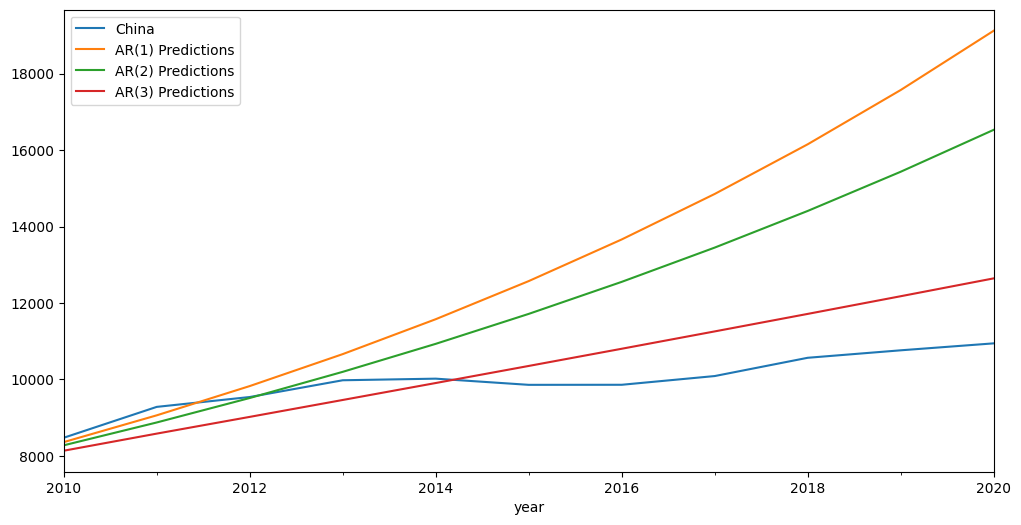

In [17]:
test['China'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))
predictions2.plot(legend=True,figsize=(12,6))
predictions3.plot(legend=True,figsize=(12,6))

In [18]:
AR4fit = AutoReg(train, lags=4,seasonal=False).fit()
predictions4 = AR4fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(4) Predictions')

<Axes: xlabel='year'>

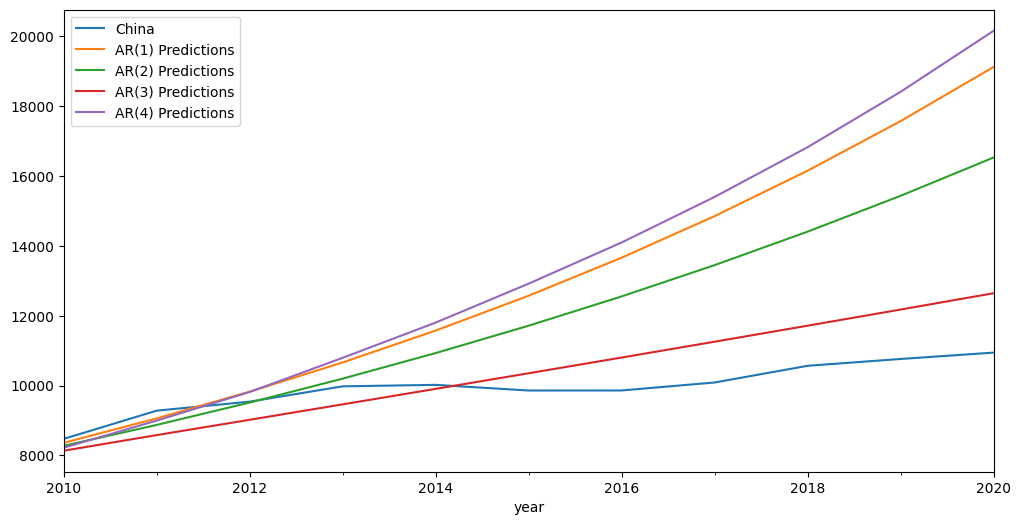

In [19]:
test['China'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))
predictions2.plot(legend=True,figsize=(12,6))
predictions3.plot(legend=True,figsize=(12,6))
predictions4.plot(legend=True,figsize=(12,6))

In [20]:
AR8fit = AutoReg(train, lags=8,seasonal=False).fit()
predictions8 = AR8fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(8) Predictions')

<Axes: xlabel='year'>

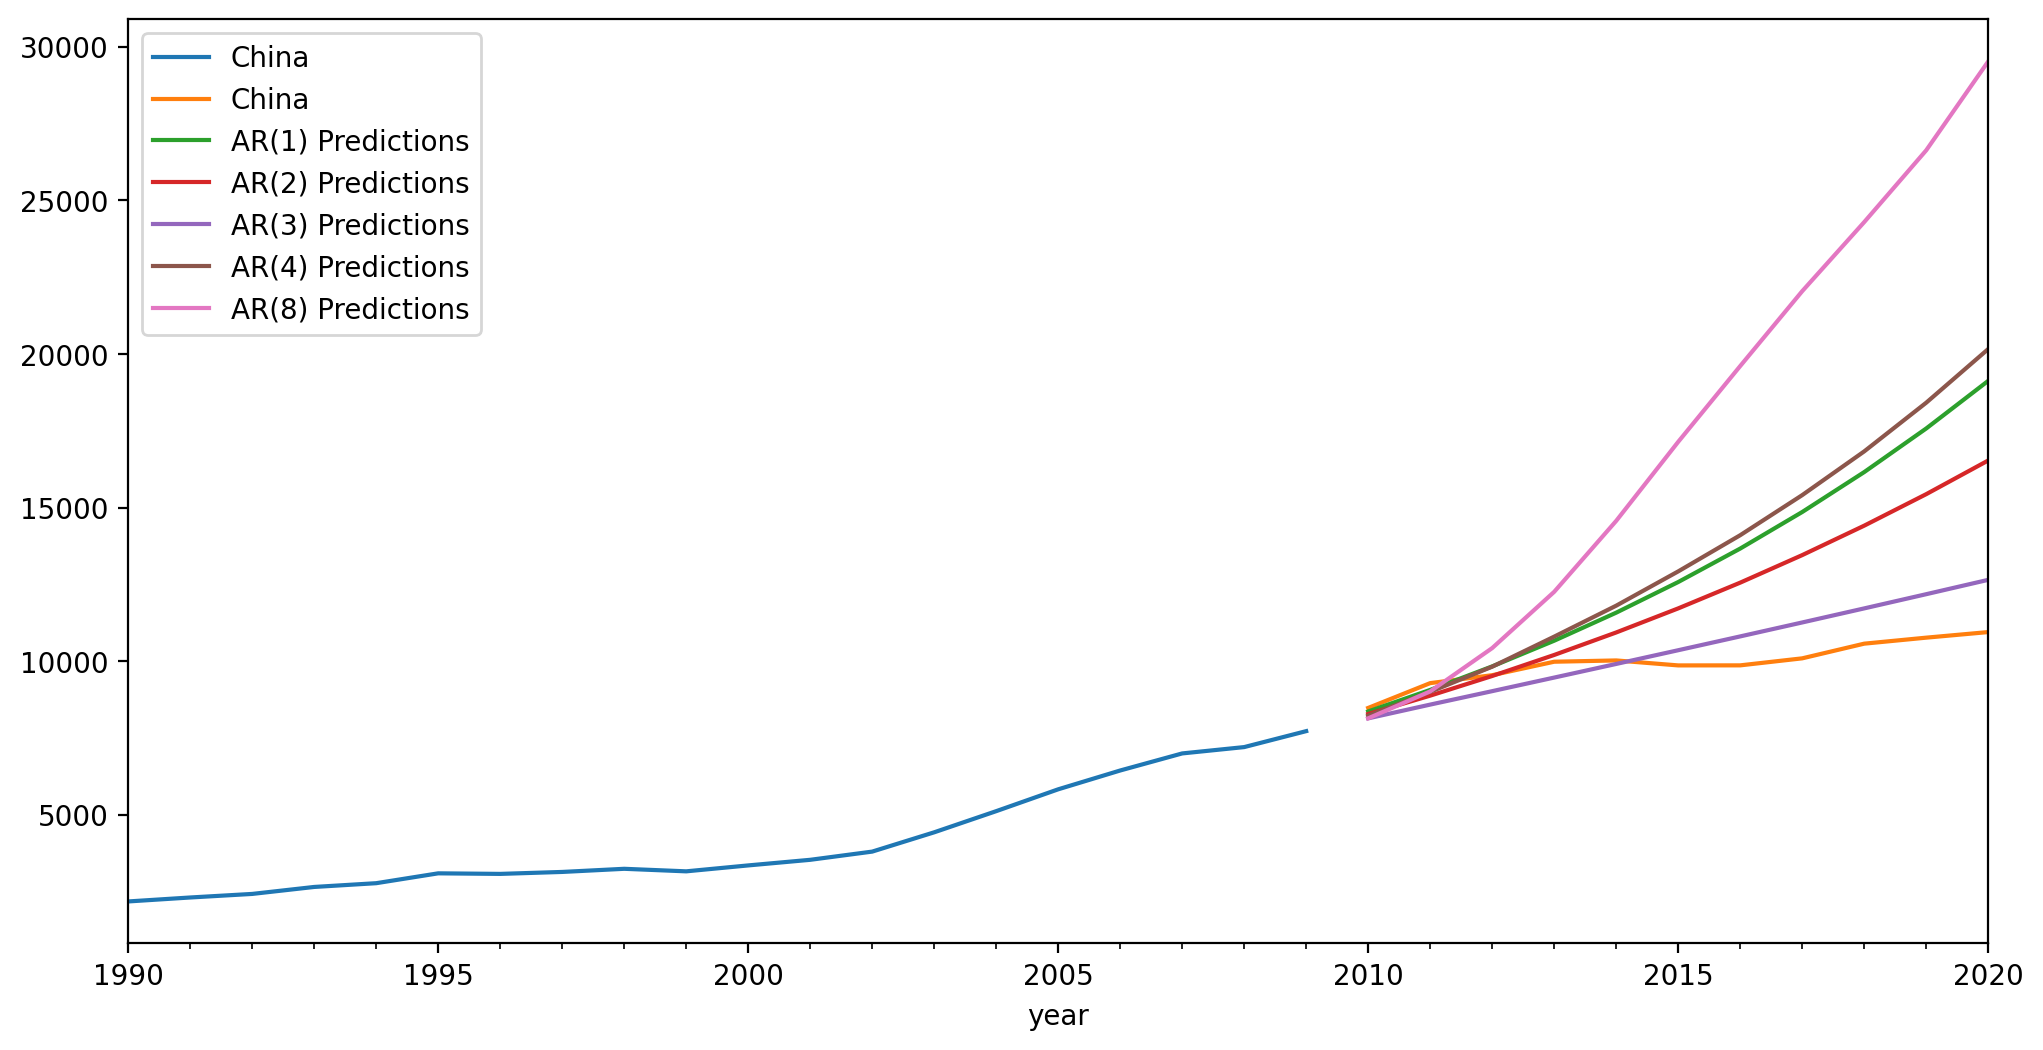

In [21]:
fig = plt.figure(dpi=200)
train['China'].plot(legend=True)
test['China'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))
predictions2.plot(legend=True,figsize=(12,6))
predictions3.plot(legend=True,figsize=(12,6))
predictions4.plot(legend=True,figsize=(12,6))
predictions8.plot(legend=True,figsize=(12,6))

In [22]:
AR5fit = AutoReg(train, lags=5,seasonal=False).fit()
predictions5 = AR5fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(5) Predictions')
AR6fit = AutoReg(train, lags=6,seasonal=False).fit()
predictions6 = AR6fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(6) Predictions')
AR7fit = AutoReg(train, lags=7,seasonal=False).fit()
predictions7 = AR7fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(7) Predictions')

<Axes: xlabel='year'>

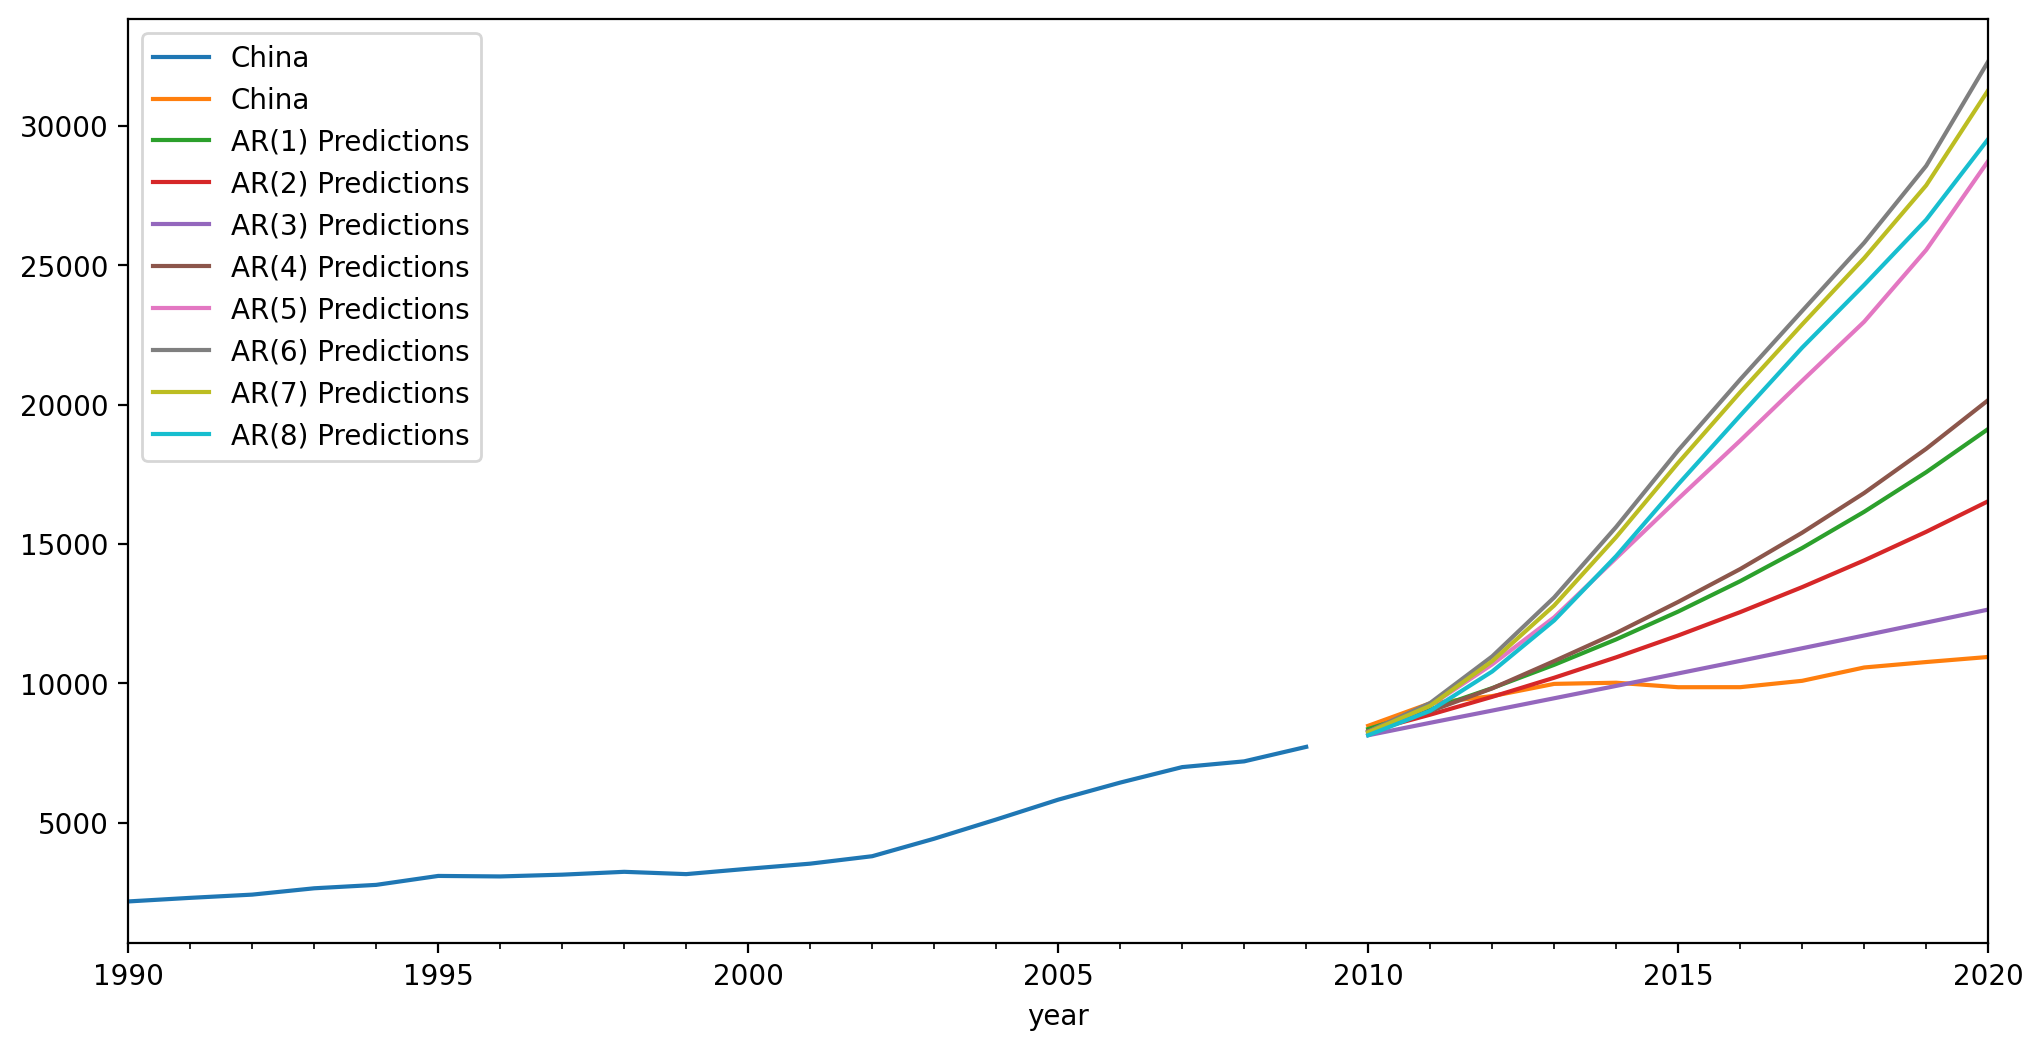

In [23]:
fig = plt.figure(dpi=200)
train['China'].plot(legend=True)
test['China'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))
predictions2.plot(legend=True,figsize=(12,6))
predictions3.plot(legend=True,figsize=(12,6))
predictions4.plot(legend=True,figsize=(12,6))
predictions5.plot(legend=True,figsize=(12,6))
predictions6.plot(legend=True,figsize=(12,6))
predictions7.plot(legend=True,figsize=(12,6))
predictions8.plot(legend=True,figsize=(12,6))

<Axes: xlabel='year'>

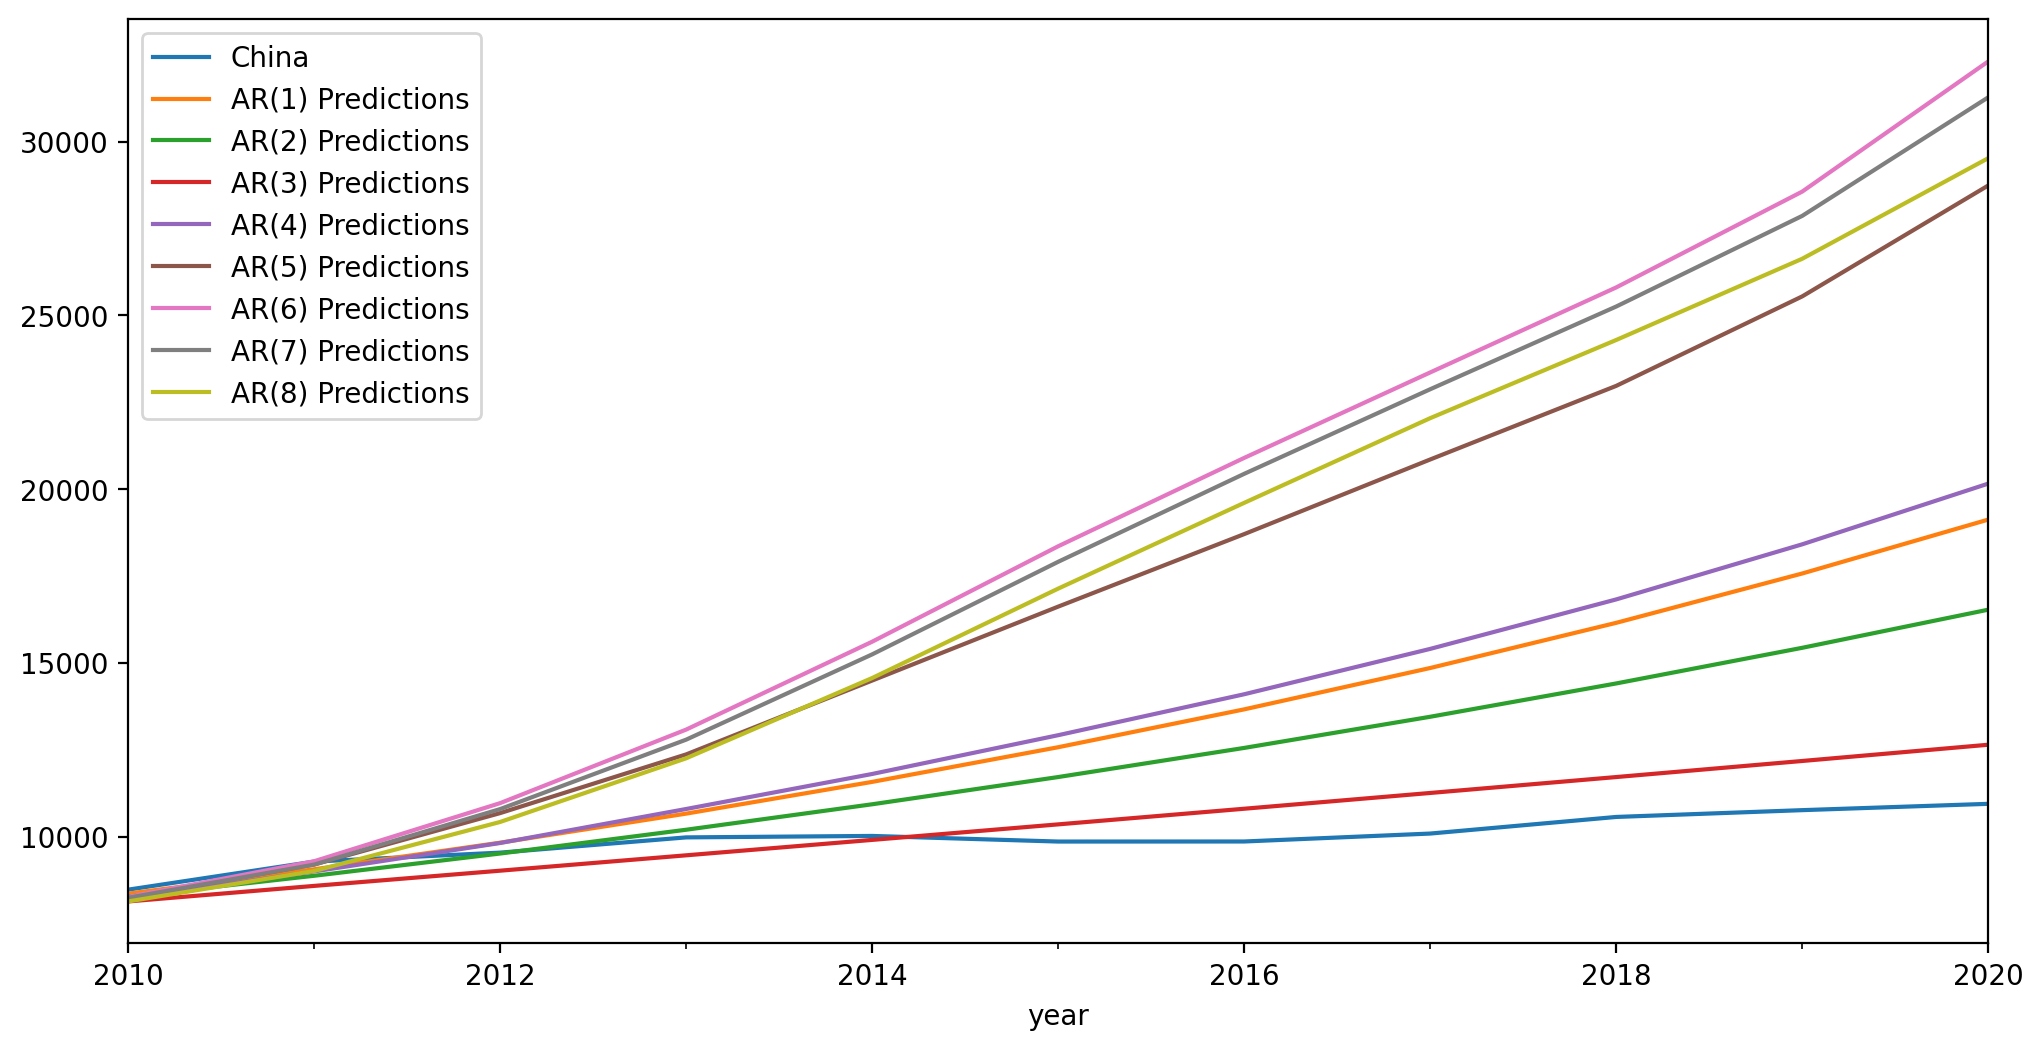

In [24]:
fig = plt.figure(dpi=200)
test['China'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))
predictions2.plot(legend=True,figsize=(12,6))
predictions3.plot(legend=True,figsize=(12,6))
predictions4.plot(legend=True,figsize=(12,6))
predictions5.plot(legend=True,figsize=(12,6))
predictions6.plot(legend=True,figsize=(12,6))
predictions7.plot(legend=True,figsize=(12,6))
predictions8.plot(legend=True,figsize=(12,6))

In [25]:
AR9fit = AutoReg(train, lags=9,seasonal=False).fit()
predictions9 = AR9fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(9) Predictions')

<Axes: xlabel='year'>

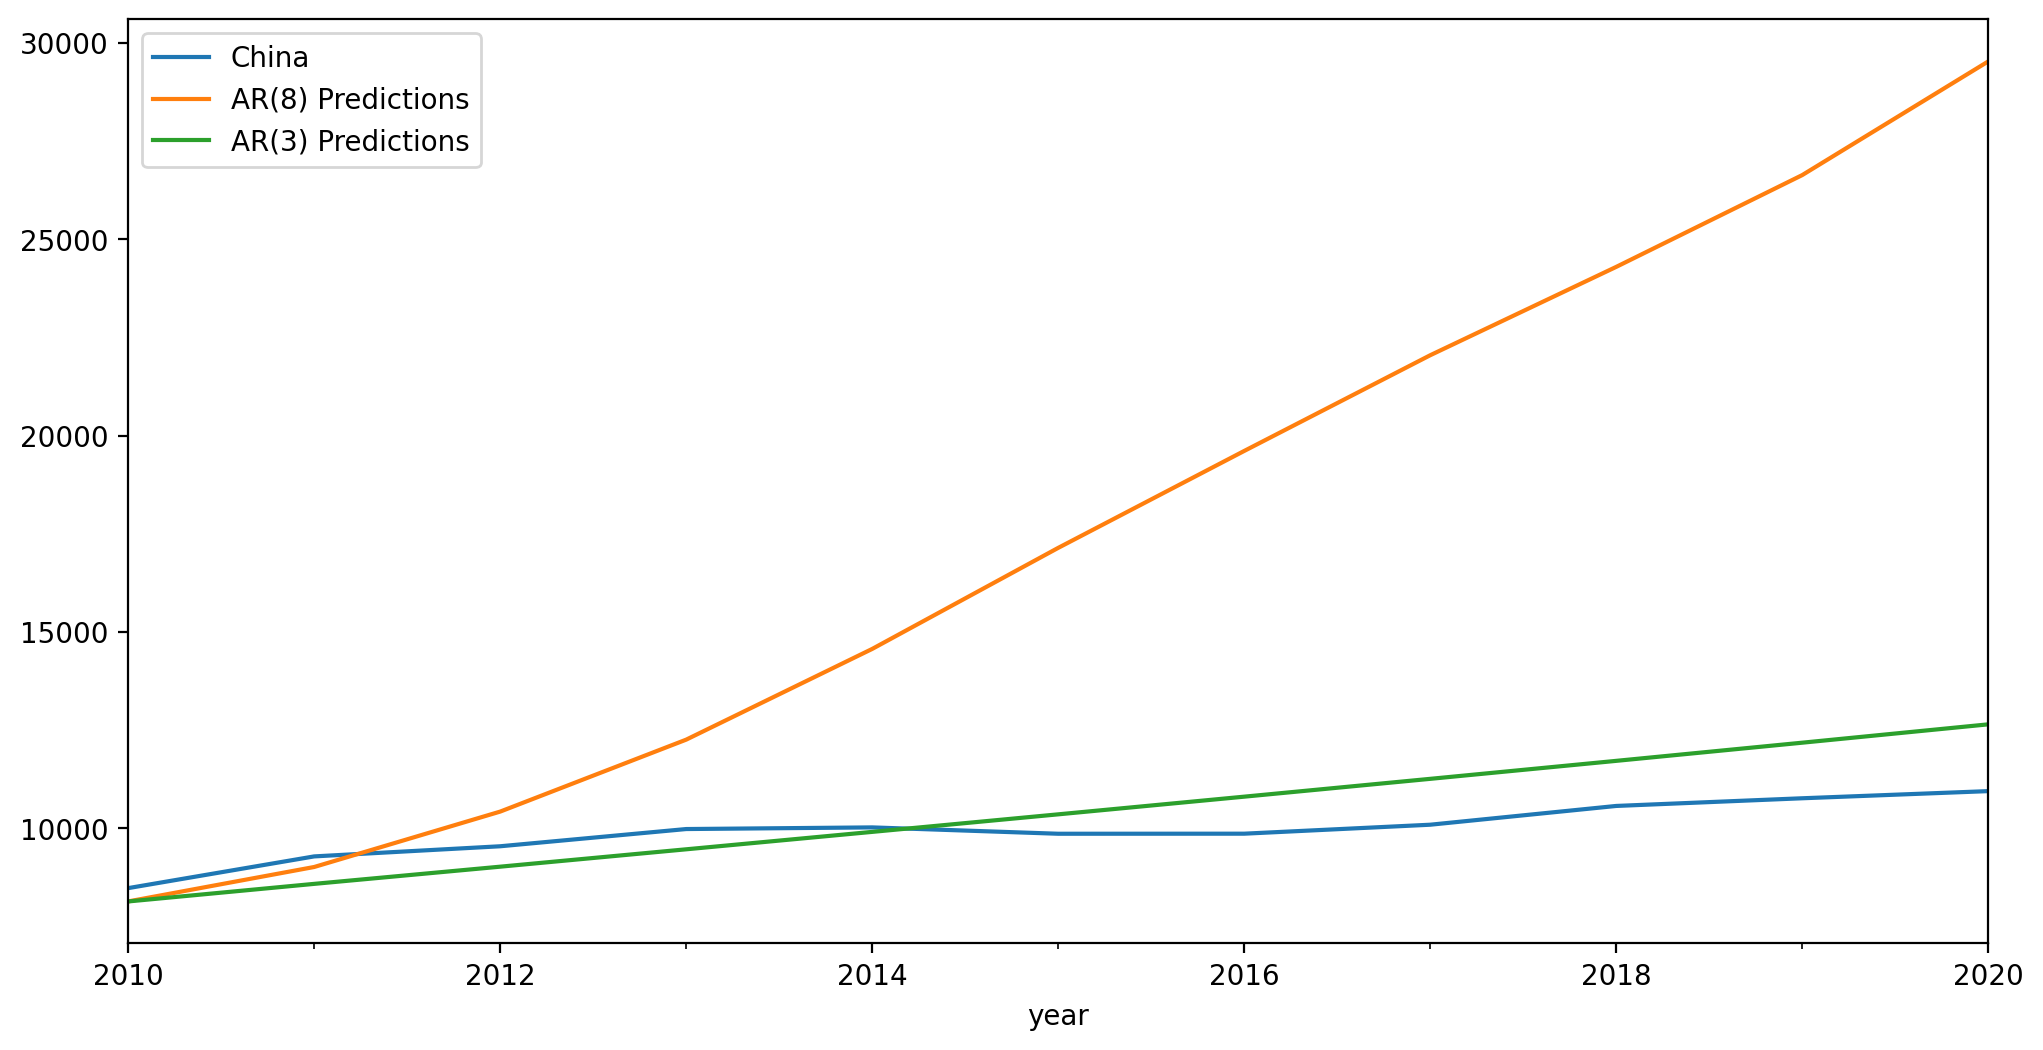

In [26]:
fig = plt.figure(dpi=200)
test['China'].plot(legend=True)
predictions8.plot(legend=True,figsize=(12,6))
predictions3.plot(legend=True,figsize=(12,6))

## Error Estimation

In [27]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(3)','AR(4)','AR(5)','AR(6)','AR(7)','AR(8)','AR(9)']
preds = [predictions1, predictions2, predictions3, predictions4, 
         predictions5, predictions6, predictions7,predictions8] 
        # these are variables, not strings!

for i in range(8):
    error = mean_squared_error(test['China'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 17461302.87
AR(2) Error: 8262796.366
AR(3) Error: 896771.4104
AR(4) Error: 22026288.32
AR(5) Error: 86920395.16
AR(6) Error: 128985349.4
AR(7) Error: 118079157.5
AR(8) Error: 100291057.2


In [28]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs


labels = ['AR(1)','AR(2)','AR(3)','AR(4)','AR(5)','AR(6)','AR(7)','AR(8)','AR(9)']
preds = [predictions1, predictions2, predictions3, predictions4, 
         predictions5, predictions6, predictions7,predictions8, predictions9] 
        # these are variables, not strings!

for i in range(9):
    error = rmse(test['China'], preds[i])
    print(f'{labels[i]} RMSE: {error:11.10}')

AR(1) RMSE: 4178.672382
AR(2) RMSE: 2874.508022
AR(3) RMSE: 946.9801531
AR(4) RMSE: 4693.217267
AR(5) RMSE: 9323.110809
AR(6) RMSE: 11357.17172
AR(7) RMSE:  10866.4234
AR(8) RMSE: 10014.54229
AR(9) RMSE: 8756.485816


In [29]:
AR3fit.params

const       85.613508
China.L1     1.490882
China.L2    -0.231873
China.L3    -0.255816
dtype: float64

## Conclusion
#### from the above we can conclude that Prediction 8 level is working better compared to other models

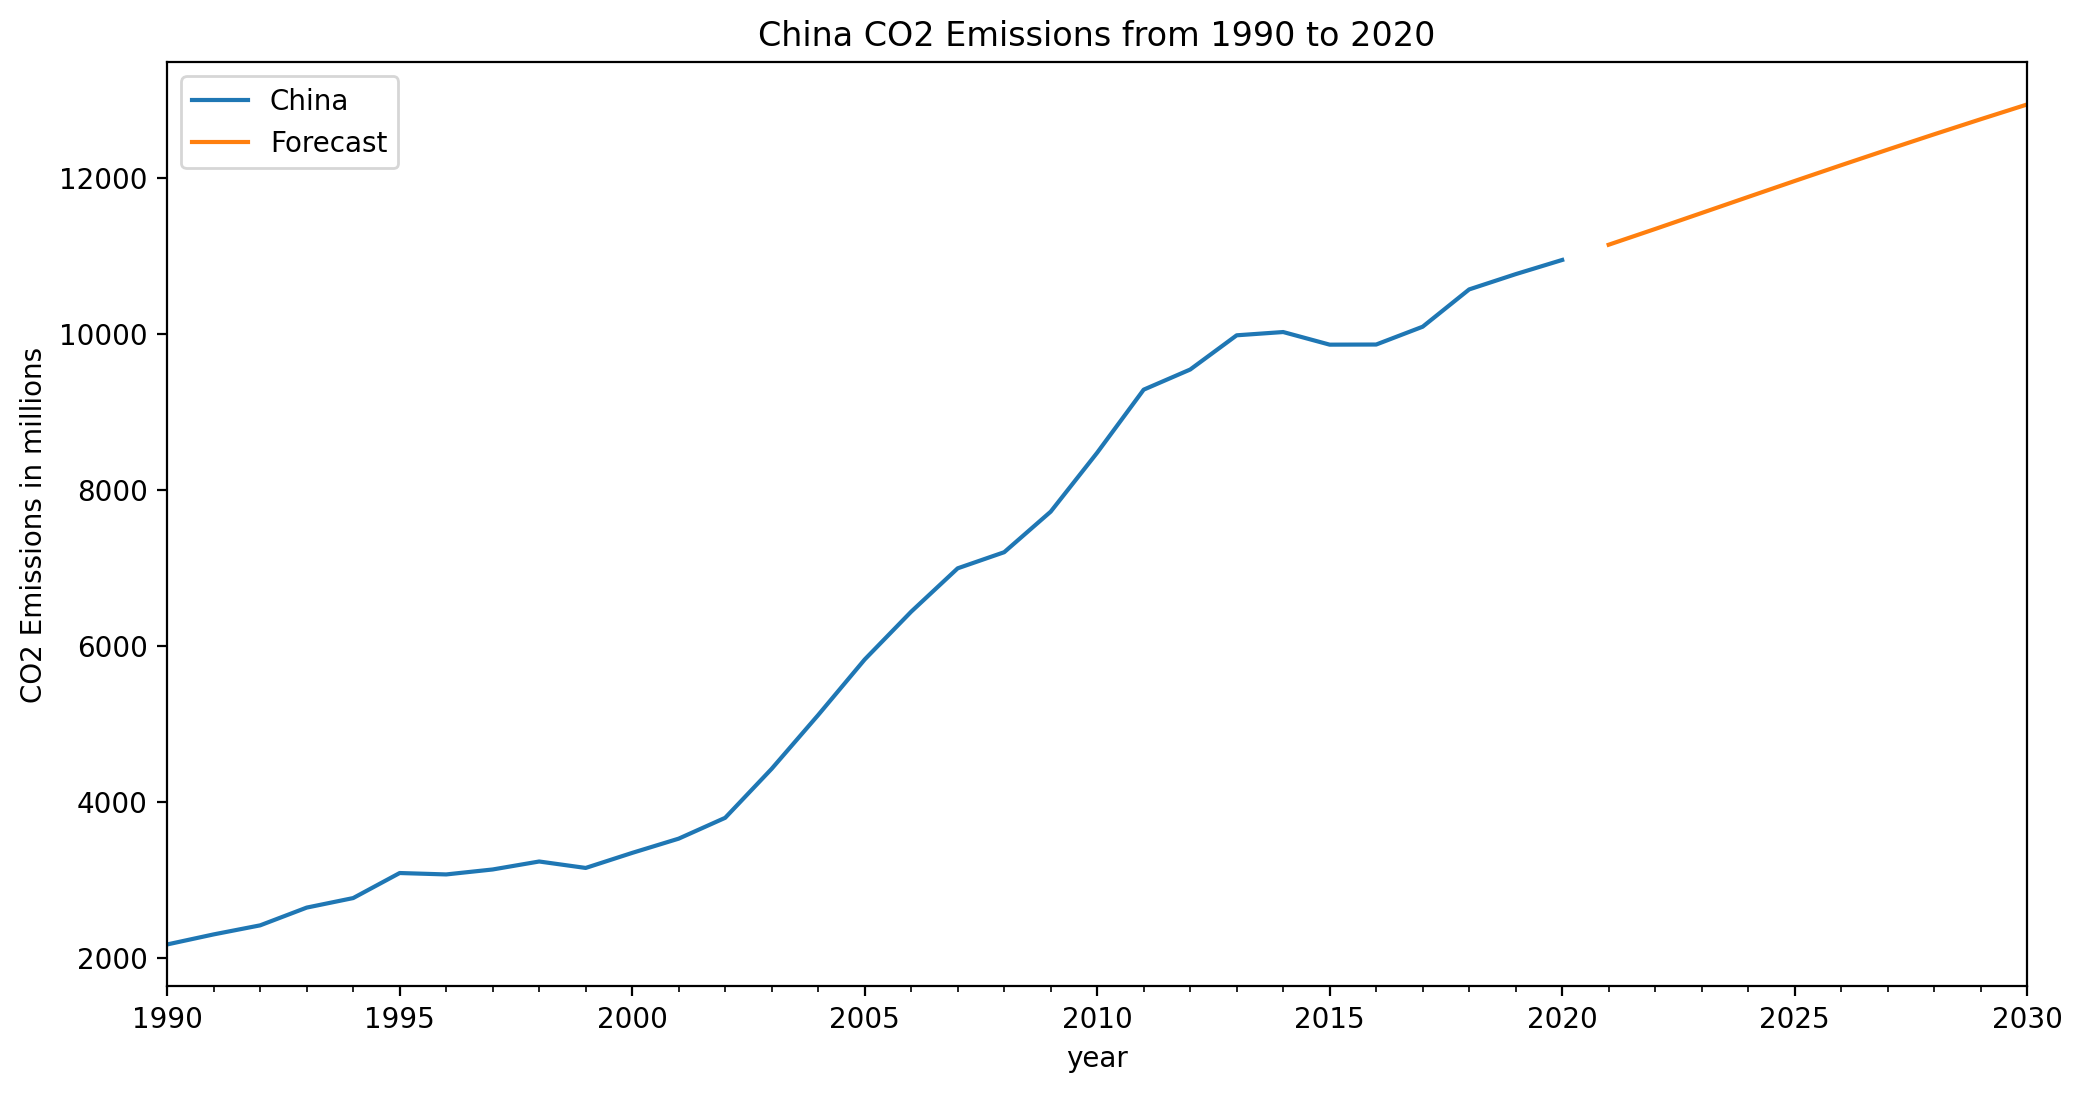

In [30]:
# First, retrain the model on the full dataset
ARfit = AutoReg(df2,lags=3,seasonal=False).fit()

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+9, 
                      dynamic=False).rename('Forecast')
pred = ARfit.get_prediction(start=len(df), end=len(df)+9, dynamic=False)
pred_ci = pred.conf_int()

# Plot the results
fig = plt.figure(dpi=200, figsize=(12,6))

df2['China'].plot(legend=True,ax = plt.gca(),ylabel='CO2 Emissions in millions',
                  title='China CO2 Emissions from 1990 to 2020')
fcast.plot(legend=True,ax = plt.gca())
plt.show()



In [31]:
cl = pd.DataFrame(pred_ci)
cl = cl.set_axis(['lower bound', 'upper bound'], axis='columns')

In [32]:
cl

,lower bound,upper bound
2021-01-01,10736.053958,11543.459392
2022-01-01,10571.313561,12112.064565
2023-01-01,10425.582787,12667.731265
2024-01-01,10307.661783,13196.669449
2025-01-01,10218.389828,13694.814364
2026-01-01,10155.474711,14162.392867
2027-01-01,10115.633753,14601.384749
2028-01-01,10095.504363,15014.350450
2029-01-01,10092.006003,15403.896837
2030-01-01,10102.455558,15772.448478


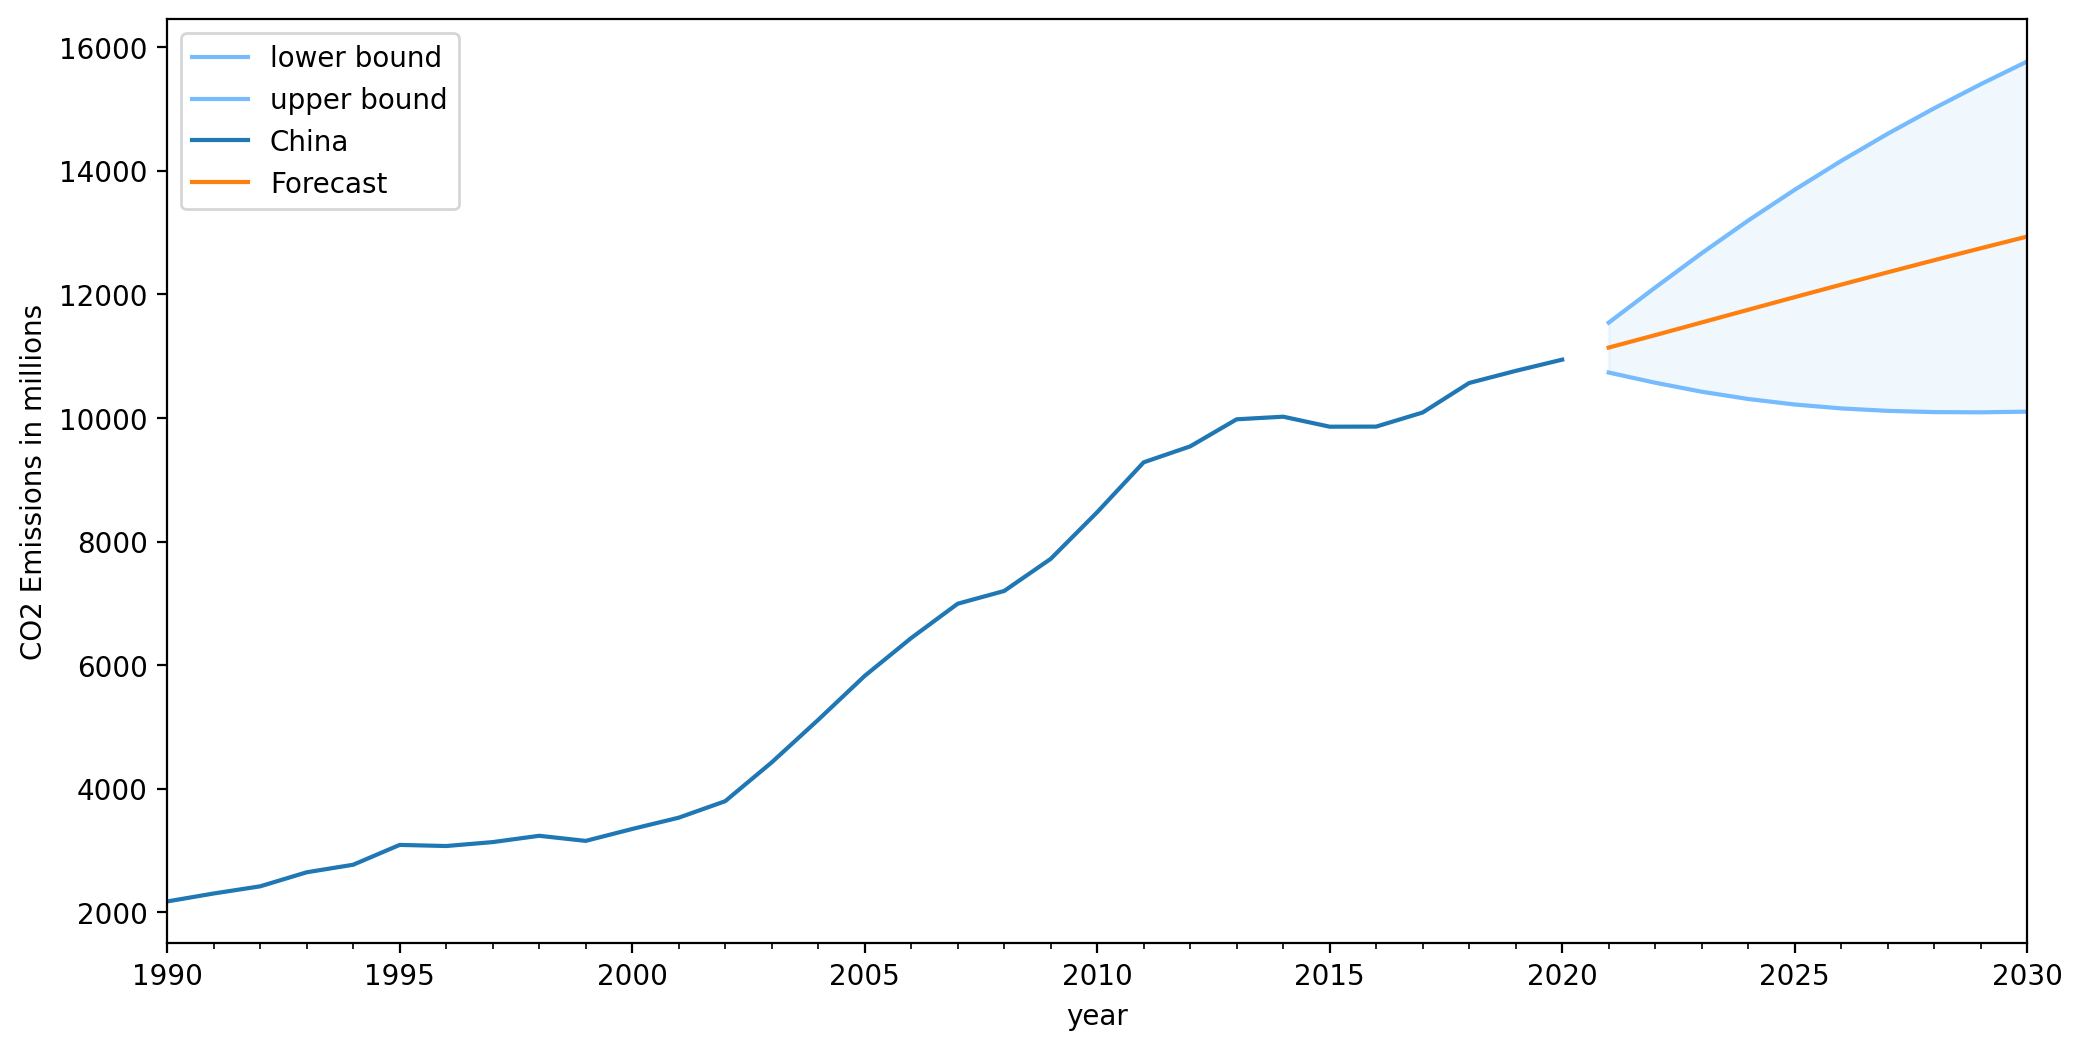

In [33]:

fig = plt.figure(dpi=200, figsize=(12,6))
cl.plot(color='xkcd:sky blue',ax = plt.gca())
df2['China'].plot(legend=True,ax = plt.gca(),ylabel='CO2 Emissions in millions'
                  )
fcast.plot(legend=True,ax = plt.gca())
plt.fill_between(cl.index,cl['lower bound'], cl['upper bound'], 
                 color='xkcd:sky blue', alpha=0.1)
plt.show();

In [34]:
print(ARfit.summary().tables[0]),
print(ARfit.summary().tables[1]),
print(ARfit.summary().tables[2])

                            AutoReg Model Results                             
Dep. Variable:                  China   No. Observations:                   31
Model:                     AutoReg(3)   Log Likelihood                -188.907
Method:               Conditional MLE   S.D. of innovations            205.975
Date:                Mon, 03 Jul 2023   AIC                            387.815
Time:                        21:08:22   BIC                            394.476
Sample:                    01-01-1993   HQIC                           389.851
                         - 01-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        155.0979     95.190      1.629      0.103     -31.471     341.667
China.L1       1.6253      0.188      8.634      0.000       1.256       1.994
China.L2      -0.6241      0.341     -1.830      0.0